# 3.1 Analyze Articles
This notebook analyzes the cleaned article data in preparation for modeling. The ultimate goal is to match cleaned articles to the products based on their cleaned product data.

In [1]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

#### Load data

In [2]:
with open("intermediate_data/Cleaned_Article_Data.json") as f:
    article_data = json.load(f)

#### Stop words to ignore

In [3]:
manual_stopwords = {
    "the", "and", "a", "to", "of", "in", "is", "it", "you", "that", "this", "on", "for", "with", "as",
    "was", "but", "are", "they", "at", "be", "from", "by", "an", "or", "not", "have", "we", "has",
    "q", "ti", "one", "get", "right", "full", "go", "can", "do", "i", "our", "your", "all", "out", 
    "what", "want", "just", "were", "into", "his", "like", "two", "so", "their", "after", "some", "day", 
    "new", "also", "will", "more", "who", "over", "back", "been", "its", "up", "first", "top", "there",
    "how", "now", "only", "off", "about", "1st", "2nd", "3rd","0","6","no", "1", "best", "year", "4th", "he",
    "here", "good", "place", "which", "than", "three", "if", "through", "cup", "seconds", "said","x","o","s","u","v","o","t"
}

#### Set token length limits

In [4]:
MIN_TOKENS = 50
MAX_TOKENS = 3000

#### Filter and truncate

In [5]:
filtered_articles = []
filtered_tokens = []

for idx, article in enumerate(article_data):
    doc_text = article.get('text', '') # Extract text from article object
    if not doc_text:  # Skip if no text
        continue   
    
    # Tokenize the text
    tokens = [token for token in re.findall(r'\b\w+\b', doc_text.lower()) if token not in manual_stopwords]
    if MIN_TOKENS <= len(tokens) <= MAX_TOKENS:
        filtered_articles.append(article)
        filtered_tokens.append(tokens)
    elif len(tokens) > MAX_TOKENS:
        filtered_articles.append(article)
        filtered_tokens.append(tokens[:MAX_TOKENS])

print(f"Filtered articles: {len(filtered_articles)} out of {len(article_data)}")

Filtered articles: 29 out of 30


#### Check for remaining articles after filtering

In [6]:
if not filtered_articles:
    print("No articles passed the filtering criteria!")
else:
    print("Proceeding with analysis...")

Proceeding with analysis...


#### Create plots using filtered tokens to analyze data

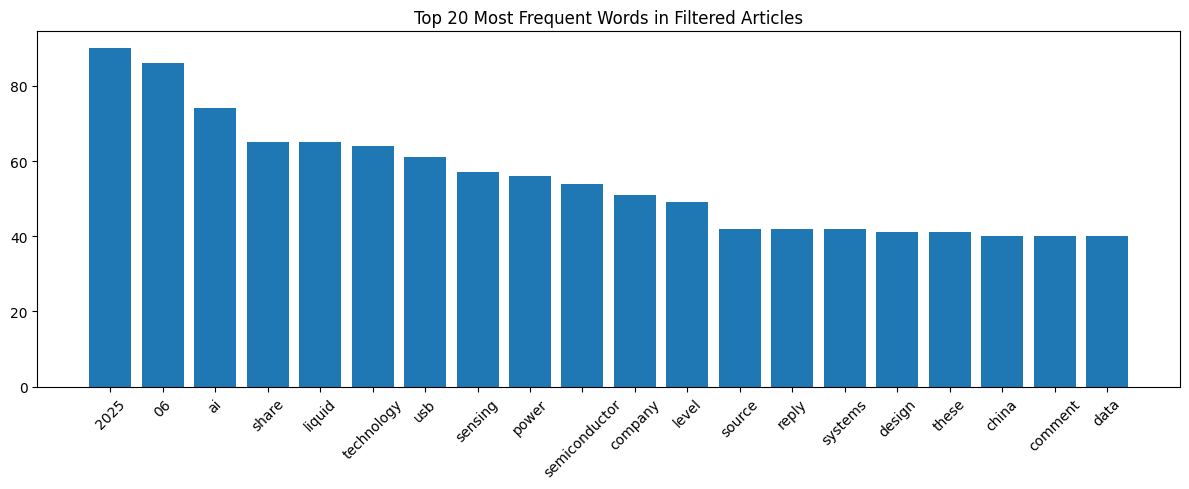

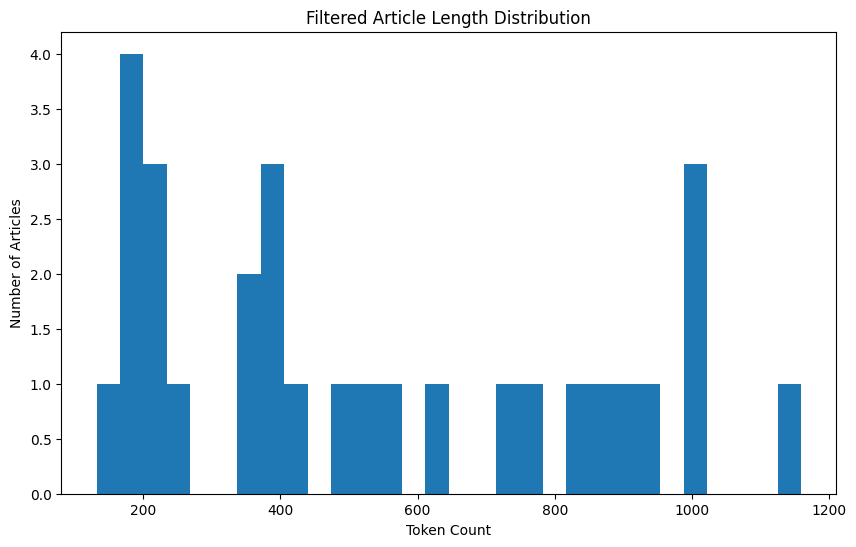

In [7]:
if filtered_articles:
    all_tokens = [token for tokens in filtered_tokens for token in tokens]
    
    # Count token frequency
    counter = Counter(all_tokens)
    most_common = counter.most_common(20)
    
    # Plot top tokens
    if most_common:
        words, counts = zip(*most_common)
        plt.figure(figsize=(12, 5))
        plt.bar(words, counts)
        plt.xticks(rotation=45)
        plt.title("Top 20 Most Frequent Words in Filtered Articles")
        plt.tight_layout()
        plt.show()
    
    # Length distribution (after filtering/truncation)
    lengths = [len(tokens) for tokens in filtered_tokens]
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=30)
    plt.title("Filtered Article Length Distribution")
    plt.xlabel("Token Count")
    plt.ylabel("Number of Articles")
    plt.show()

## Next Step
After you have completed your article analysis here, run the next step in the workflow [03-02-AnalyzeProducts.ipynb](./03-02-AnalyzeProducts.ipynb) or go back to [00-Workflow.ipynb](./00-Workflow.ipynb).

---

**Authors:**
[Salah Mohamoud](mailto:salah.mohamoud.dev@gmail.com),
[Sai Keertana Lakku](mailto:saikeertana005@gmail.com),
[Zhen Zhuang](mailto:zhuangzhen17cs@gmail.com),
[Nick Capaldini](mailto:nick.capaldini@ridethenextwave.com), Ride The Next Wave, May 19, 2025

---